<a href="https://colab.research.google.com/github/AlexandraBushueva/my-projects/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D0%B0_%D0%B0%D1%80%D0%B5%D0%BD%D0%B4%D1%8B_%D1%81%D0%B0%D0%BC%D0%BE%D0%BA%D0%B0%D1%82%D0%BE%D0%B2_GoFast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистический анализ данных сервиса аренды самокатов GoFast

Cервис аренды самокатов GoFast предоставил данные о некоторых пользователях из нескольких городов, а также об их поездках.

**Цель исследования**: найти точки роста путем проведения анализа данных и проверки гипотез.


**Задачи исследования:**
1. Изучение общей информации о данных:
- импорт бибилиотек
- импорт данных из csv-файлов
- изучение полей и их типов
2. Предобработка данных:
- изменение типов данных
- удаление дубликатов
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Формирование общего вывода по исследованию

Необходимо проверить следующие **гипотезы**:
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
4. Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
   
**Описание данных**
В основных данных есть информация о пользователях, их поездках и подписках.

*Пользователи — users_go.csv*
- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type	- тип подписки (free, ultra)

*Поездки — rides_go.csv*
- user_id	- уникальный идентификатор пользователя
- distance	- расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

*Подписки — subscriptions_go.csv*
- subscription_type	- тип подписки
- minute_price	- стоимость одной минуты поездки по данной подписке
- start_ride_price	- стоимость начала поездки
- subscription_fee	- стоимость ежемесячного платежа

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
   -  абонентская плата отсутствует;
   - стоимость одной минуты поездки — 8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных: импорт бибилиотек, импорт данных из csv-файлов, изучение полей и их типов

In [ ]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [ ]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Пропущенных значений в полях нет, типы данных указаны корректно

In [ ]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [ ]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Пропущенных значений нет.
Необходимо изменить тип данных в столбце: **date:** object → datetime. Необходимо перевести поле в формат даты.

In [ ]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [ ]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Пропущенных значений в полях нет, типы данных указаны корректно

#### Шаг 2. Предобработка данных

**2.1 Приведем столбец date к типу даты pandas**

In [ ]:
#Меняем тип данных на datetime
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%dT%H:%M:%S')

#Проверяем
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**2.2  Создадим новый столбец с номером месяца на основе столбца date**

In [ ]:
#Добавляем столбец месяца
rides['month_exposition'] = rides['date'].dt.month

#Проверяем вывод
rides

,user_id,distance,duration,date,month_exposition
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


**2.3 Проверим наличие дубликатов в датафреймах и обработаем их**

In [ ]:
#Проверяем наличие дубликатов
users.duplicated().sum()

31

In [ ]:
#удялем дубликаты
users = users.drop_duplicates()

#Проверяем, что дубликаты удалены
users.duplicated().sum()

0

In [ ]:
#Проверяем наличие дубликатов
rides.duplicated().sum()

0

Дубликатов в таблице rides нет

#### Шаг 3. Исследовательский анализ данных

**3.1 Частота встречаемости городов**

In [ ]:
# Группируем по типу подписки и считаем количество пользователей
users_count = users.groupby('city')['user_id'].count()

# Рассчитываем процент пользователей в каждом типе подписки относительно общего числа пользователей
users_percent = (users_count / users['user_id'].count()).map('{:.1%}'.format)

# Объединяем оба результата в одну таблицу
users_city = pd.concat([users_count, users_percent], axis=1)
users_city.columns = ['Кол-во пользователей', 'Доля пользователей']

# Сортируем данные и выводим на экран
users_city.sort_values('Доля пользователей', ascending = False)

,Кол-во пользователей,Доля пользователей
city,,
Пятигорск,219,14.3%
Екатеринбург,204,13.3%
Ростов-на-Дону,198,12.9%
Краснодар,193,12.6%
Сочи,189,12.3%
Омск,183,11.9%
Тюмень,180,11.7%
Москва,168,11.0%


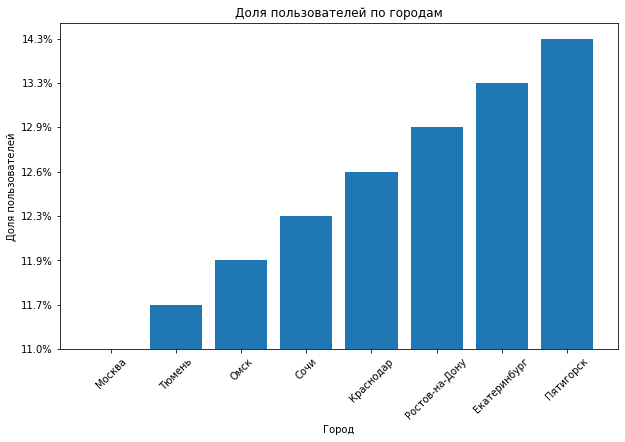

In [ ]:
# Сортируем данные по доле пользователей в убывающем порядке
users_city = users_city.sort_values('Доля пользователей', ascending=True)

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(users_city.index, users_city['Доля пользователей'])
plt.xlabel('Город')
plt.ylabel('Доля пользователей')
plt.title('Доля пользователей по городам')
plt.xticks(rotation=45);

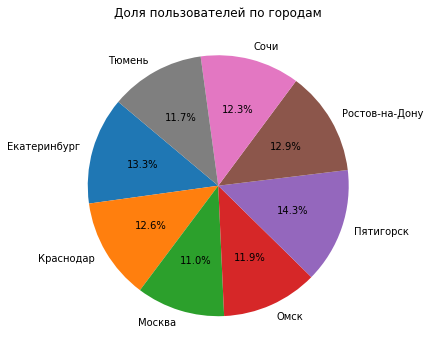

In [ ]:
# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie(users_count, labels=users_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Доля пользователей по городам')

# Выводим на экран
plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

В работе ожидалось больше  визуализаций, прошу добавить здесь и для визуализации распределений тарифов какие-нибудь графики
</div>

Основная доля пользователей сервиса находится в Пятигорске, Екатеренбруге, Ростове-на-Дону.

Интересно, что сервис реже используется в Москве, скорее всего из-за конкуренции с другими схожими сервисами. И нет пользоватеелй из второго самого крупного города в России - Санкт-Петербурга.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо, когда секторов многовато рекомендовал бы столбчатую диаграмму использовать

</div>

**3.2 Соотношение пользователей с подпиской и без подписки**

In [ ]:
# Группируем по типу подписки и считаем количество пользователей
subscription_count = users.groupby('subscription_type')['user_id'].count()

# Рассчитываем процент пользователей в каждом типе подписки относительно общего числа пользователей
subscription_percent = (subscription_count / users['user_id'].count()).map('{:.1%}'.format)

# Объединяем оба результата в одну таблицу
subscription_city = pd.concat([subscription_count, subscription_percent], axis=1)
subscription_city.columns = ['Кол-во пользователей', 'Доля пользователей']

# Сортируем данные и выводим на экран
subscription_city.sort_values('Доля пользователей', ascending = False)


,Кол-во пользователей,Доля пользователей
subscription_type,,
free,835,54.4%
ultra,699,45.6%


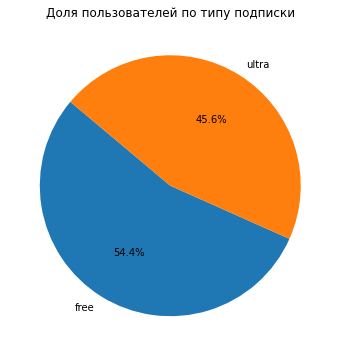

In [ ]:
# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie(subscription_count, labels=subscription_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Доля пользователей по типу подписки')

# Выводим на экран
plt.show()

Чуть больше половины пользователей пользуются сервисом без подписки - 55%, остальная доля пользователей оплачивает подписку Ultra.

**3.3 Возраст пользователей**

In [ ]:
#Выведем описательную статистику по столбцу age
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Средний возраст пользователей сервиса 25 лет (как по среднему, так и по медиане при округлении). Пользователь с максимальным возрастом из выборки достиг 43-х лет, младший - 12-ти лет.

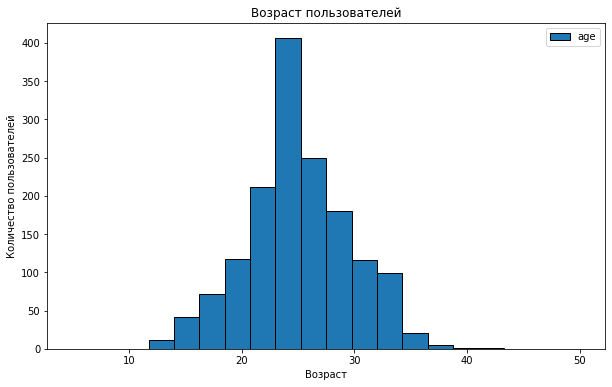

In [ ]:
#Построим гистограмму по полю age
users.plot(y = 'age', kind = 'hist', bins = 20, grid=True, ec='black', legend=True, figsize = (10,6), range = (5,50))
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Хочу обратить внимание на то, что имеются пользователи до 18 лет, что любопытно

По гистограмме видим, что основная доля пользователей находится в возрасте 20-30 лет. Чаще всего сервисом пользуются люди 25 лет.

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

In [ ]:
#Выведем описательную статистику по столбцу distance
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Минимальное расстояние, которое преодолели пользователи за одну поездку - 0,85 м. Похоже на выброс в значениях. Возможно пользователь передумал ехать, сломался самокат и т.д., лиюо ошибка в данных.
Максимальное расстояние - 7 211 м. В среднем пользователи проезжают около 3 тыс. м.

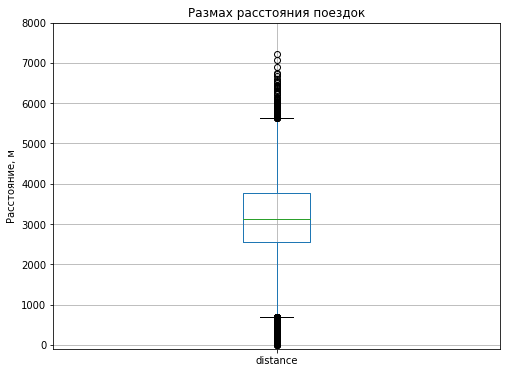

In [ ]:
# Построим диаграму размаха для определения выбросов в значениях
rides.boxplot(column='distance', figsize=(8, 6))
plt.title('Размах расстояния поездок')
plt.ylim(-100, 8000)
plt.ylabel('Расстояние, м')
plt.show()

В выбросы попадают поездки менее 800 м. и более 5500 м.

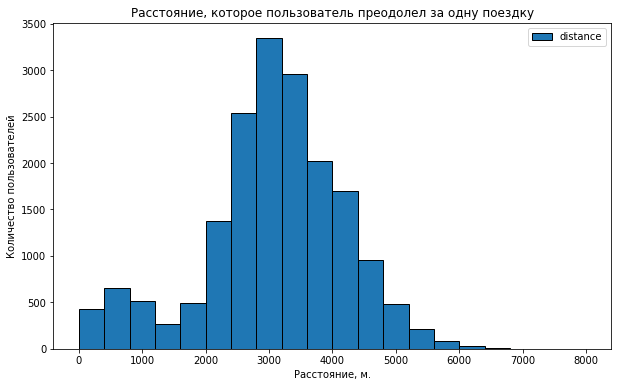

In [ ]:
#Построим гистограмму по полю distance
rides.plot(y = 'distance', kind = 'hist', bins = 20, grid=True, ec='black', legend=True, figsize = (10,6), range = (0,8000))
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наличие пары пиков дистанций наталкивает на мысль, что может быть несколько сценариев пользования приложением и с этими категориями стоит отдельно работать

Чаще всего пользователи совершают поездки на расстояние 2-4,5 км. Реже пользователи совершают на самокате дальние поездки на расстояние более 4,5 км.

**3.5 Продолжительность поездок**

In [ ]:
#Выведем описательную статистику по столбцу distance
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

В среднем пользователи тратят на поездку около 17 минут. Самая быстрая поездка составила 0,5 секунд. Скорее всего поездка не состоялась. Причинами могут быть технические неисправности, пользователь решил не ехать на самокате. Самая длинная поездка заняла у пользователей 40 минут.

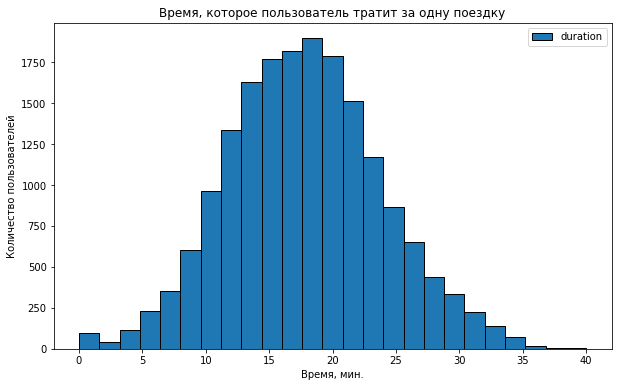

In [ ]:
#Построим гистограмму по полю duration
rides.plot(y = 'duration', kind = 'hist', bins = 25, grid=True, ec='black', legend=True, figsize = (10,6), range = (0,40))
plt.title('Время, которое пользователь тратит за одну поездку')
plt.xlabel('Время, мин.')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️

Рекомендовал бы внимательнее рассмотреть поездки, которые длились до минуты, это похоже на аномалии и стоит убедиться, короткие ли это поездки или какие-то сбои логирования
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Да, обратила на это внимание. Ниже в анализе данных предположила, что это отмененные пользователями поездки (возможно они передумаи или случился технический сбой с самокатом.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Поездки довольно длинные на самом деле
</div>

Основная доля пользователей тратит на поездку 10-25 минут.

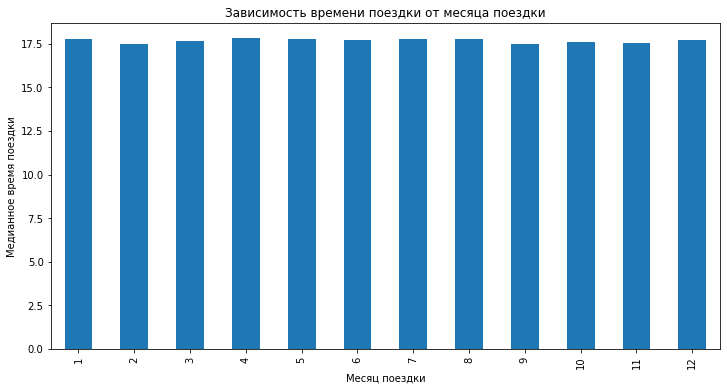

In [ ]:
# Проверим гипотезу о зависимости времени поездки от месяца поездки
# Вычисляем медианное время поездки для каждого месяца
median_duration_by_month = rides.groupby('month_exposition')['duration'].median()

# Построение гистограммы
plt.figure(figsize=(12, 6))
median_duration_by_month.plot(kind='bar')
plt.xlabel('Месяц поездки')
plt.ylabel('Медианное время поездки')
plt.title('Зависимость времени поездки от месяца поездки')
plt.show()

Гипотеза не подтвердилась. Пользователи в разные месяца примерно одинаково используют самокаты по времени.

#### Шаг 4. Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм**

In [ ]:
data = rides.merge(users, on='user_id', how='left').merge(subscriptions, on='subscription_type', how='left')
data

,user_id,distance,duration,date,month_exposition,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [ ]:
rides.shape

(18068, 5)

In [ ]:
# Проверим наличие пропусков в объединенной таблице
if data.isnull().values.any():
    print("В объединенной таблице есть пропуски.")
else:
    print("В объединенной таблице нет пропусков.")

# Проверим наличие пропусков в объединенной таблице
if data.isnull().values.any():
    print("В объединенной таблице есть пропуски (NaN).")
else:
    print("В объединенной таблице нет пропусков (NaN).")

# Ожидаемый размер объединенной таблицы
expected_rows = rides.shape[0]  # Ожидаемое количество строк
expected_columns = 12  # Ожидаемое количество столбцов (уникальыне столбцы в трех таблицах)

# Проверьте размер объединенной таблицы
if data.shape == (expected_rows, expected_columns):
    print(f"Размер объединенной таблицы соответствует ожиданиям ({expected_rows} строк и {expected_columns} столбцов).")
else:
    print(f"Размер объединенной таблицы не соответствует ожиданиям. Ожидается ({expected_rows} строк и {expected_columns} столбцов), но получено ({data.shape[0]} строк и {data.shape[1]} столбцов).")

В объединенной таблице нет пропусков.
В объединенной таблице нет пропусков (NaN).
Размер объединенной таблицы соответствует ожиданиям (18068 строк и 12 столбцов).


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Отлично! Спасибо за совместную работу, желаю успехов далее!

</div>

**4.2 Создади два датафрейма: c данными о пользователях без подписки, с данными о пользователях с подпиской**

In [ ]:
user_ultra = data[data['subscription_type'] == 'ultra']
user_ultra

,user_id,distance,duration,date,month_exposition,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


In [ ]:
user_free = data[data['subscription_type'] == 'free']
user_free

,user_id,distance,duration,date,month_exposition,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


**4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий**

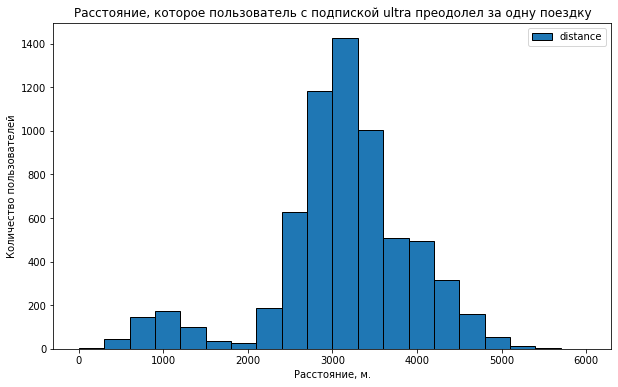

In [ ]:
#Построим гистограмму по полю distance для пользователей подписки ultra
user_ultra.plot(y = 'distance', kind = 'hist', bins = 20, grid=True, ec='black', legend=True, figsize = (10,6), range = (0,6000))
plt.title('Расстояние, которое пользователь с подпиской ultra преодолел за одну поездку')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

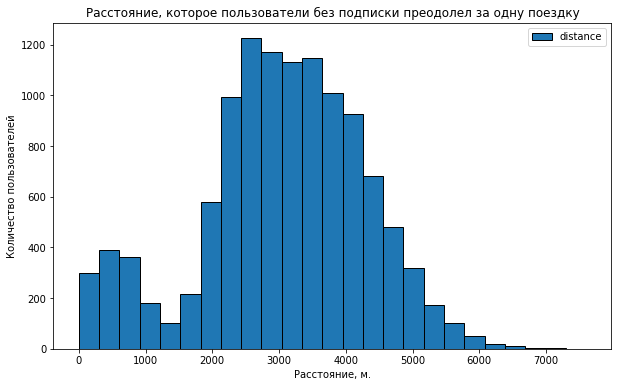

In [ ]:
#Построим гистограмму по полю distance для пользователей без подписки
user_free.plot(y = 'distance', kind = 'hist', bins = 25, grid=True, ec='black', legend=True, figsize = (10,6), range = (0,7600))
plt.title('Расстояние, которое пользователи без подписки преодолел за одну поездку')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

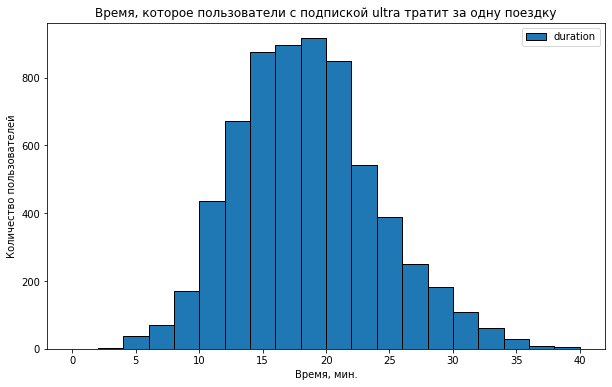

In [ ]:
#Построим гистограмму по полю duration для пользователей подписки ultra
user_ultra.plot(y = 'duration', kind = 'hist', bins = 20, grid=True, ec='black', legend=True, figsize = (10,6), range = (0,40))
plt.title('Время, которое пользователи с подпиской ultra тратит за одну поездку')
plt.xlabel('Время, мин.')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

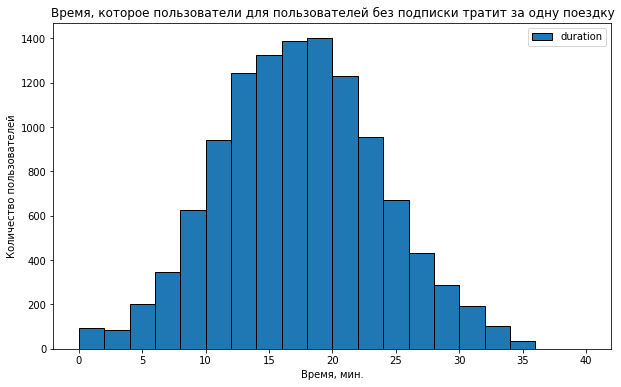

In [ ]:
#Построим гистограмму по полю duration для пользователей для пользователей без подписки
user_free.plot(y = 'duration', kind = 'hist', bins = 20, grid=True, ec='black', legend=True, figsize = (10,6), range = (0,40))
plt.title('Время, которое пользователи для пользователей без подписки тратит за одну поездку')
plt.xlabel('Время, мин.')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Проще сравнивать распределения на одном графике, поэтому рекомендовал бы продолжительность двух категорий расположить на одном графике, аналогично с расстоянием
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/12043672/how-to-take-draw-an-average-line-for-a-scatter-plot) можно посмотреть, как добавить такую визуализацию

Основной профиль клиентов с подпиской и без:
- с подпиской: основная доля пользователей тратит на поездки от 17 до 22 мин, проезжая расстояние от 2,5 до 3,5 км
- без подписки: на поездку тратится от 15 до 20 мин, проезжают расстояние от 2 до 4,5 км.

Пользователи с подпиской тратят немного больше времени на поездки, но пользователи без подписки преодолевают более длинные дистанции. Было бы интересно посмотреть на среднюю скорость движения самокатов в зависимости от налчиия подписки.

#### Шаг 5. Подсчёт выручки

In [ ]:
total_data = pd.pivot_table(data,
                           index=['month_exposition', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum,
                                      'duration' : sum,
                                      'name' : len,
                                      'subscription_type' : min})
total_data.rename(columns = {'name' : 'count_tips'}, inplace = True)
total_data['duration'] = np.ceil(total_data['duration'])
total_data

distance  duration  count_tips subscription_type
month_exposition user_id                                                     
1                1        7027.511294      42.0           2             ultra
                 3        3061.777147      13.0           1             ultra
                 5        3914.646990      13.0           1             ultra
                 7        6478.080979      28.0           2             ultra
                 12       3577.151148      33.0           1             ultra
...                               ...       ...         ...               ...
12               1525     4597.854350      34.0           1              free
                 1526     3644.121544      23.0           1              free
                 1528     3998.569324      11.0           1              free
                 1532     6111.889853      41.0           2              free
                 1534     2371.711192      16.0           1              free

[11331 rows x 4 columns]

In [ ]:
# Найдем помесячную выручку
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_tips']
    else:
        return 'none'

In [ ]:
total_data['revenue_per_month'] = total_data.apply(revenue, axis=1)
total_data

distance  duration  count_tips subscription_type  \
month_exposition user_id                                                        
1                1        7027.511294      42.0           2             ultra   
                 3        3061.777147      13.0           1             ultra   
                 5        3914.646990      13.0           1             ultra   
                 7        6478.080979      28.0           2             ultra   
                 12       3577.151148      33.0           1             ultra   
...                               ...       ...         ...               ...   
12               1525     4597.854350      34.0           1              free   
                 1526     3644.121544      23.0           1              free   
                 1528     3998.569324      11.0           1              free   
                 1532     6111.889853      41.0           2              free   
                 1534     2371.711192      16.0           1              free   

                          revenue_per_month  
month_exposition user_id                     
1                1                    451.0  
                 3                    277.0  
                 5                    277.0  
                 7                    367.0  
                 12                   397.0  
...                                     ...  
12               1525                 322.0  
                 1526                 234.0  
                 1528                 138.0  
                 1532                 428.0  
                 1534                 178.0  

[11331 rows x 5 columns]

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Доход посчитан верно, вперёд к проверке гипотез!

#### Шаг 6. Проверка гипотез

**6.1 Тратят ли пользователи с подпиской больше времени на поездки?**

H_0: Время пользователей с подпиской = время пользователей без подписки

H_1: Время пользователей с подпиской > время пользователей без подписки

alpha = 0.05

In [ ]:
ultra = user_ultra['duration']
free = user_free['duration']

alpha = 0.05

results = st.ttest_ind(ultra,
                       free,
                       alternative = 'greater')



print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Результаты t-теста указывают на то, что p-значение равно 1.2804098316645618e-34, что крайне мало. Это означает, что с очень высокой вероятностью нулевая гипотеза о равенстве времени пользователей с подпиской времени пользователей без подписки может быть отвергнута.

Следовательно, на основе предоставленных данных, есть статистически значимое различие во времени, проведенном пользователями с подпиской и пользователями без подписки, и альтернативная гипотеза может быть подтверждена.

**6.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**

H_0: Расстояние пользователей на подписке ultra = 3130 метров

H_1: Расстояние пользователей на подписке ultra < 3130 метров

In [ ]:
ultra_dist = user_ultra['distance']

interested_value = 3130

alpha = .05

results = st.ttest_1samp(
    ultra_dist,
    interested_value,
    alternative='less')

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.08046311521502146
Не удалось отвергнуть нулевую гипотезу


На основе полученных результатов теста, нельзя утверждать, что среднее расстояние, которое проезжают пользователи с подпиской Ultra за одну поездку, не превышает 3130 метров.

**6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**

H_0: Выручка пользователей на подписке ultra = выручка пользователей без подписки

H_1: Выручка пользователей на подписке ultra > выручка пользователей без подписки

In [ ]:
ultra_per_mnth = total_data.loc[total_data.subscription_type == 'ultra', 'revenue_per_month']

free_per_mnth = total_data.loc[total_data.subscription_type == 'free', 'revenue_per_month']


results = st.ttest_ind(ultra_per_mnth,
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.8130926188487286e-35
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что формулируешь нулевую, альтернативную гипотезу, это важно, выводы верны, ещё могу порекомендовать дополнительно проверять себя и выводить среднее проверяемых переменных или распределения

На основе предоставленных данных, есть статистически значимое различие в месячной выручке от пользователей с подпиской Ultra и пользователей без подписки, и альтернативная гипотеза может быть подтверждена.

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Для проверки гипотезы потребуется провести **парный t-тест для сравнения средних значений двух связанных выборок**.

Этот тест поможет вам определить, есть ли статистически значимое изменение в количестве обращений в техподдержку после обновления серверов.

Гипотезы могут быть сформулированы следующим образом:

- H0: Среднее количество обращений в техподдержку до обновления серверов равно среднему количеству после обновления.
- H1: Среднее количество обращений в техподдержку до обновления серверов не равно среднему количеству после обновления.

Проведение парного t-теста позволит оценить статистическую значимость различия между двумя выборками и определить, было ли снижение количества обращений после обновления серверов статистически значимым.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️

Всё же в задании ожидается не просто изменение, а изменение в конкретную сторону, как это повлияет на альтернативную гипотезу?

#### Шаг 7. Общий вывод

В процессе проведенного исследования были проделаны следующие итерации с данными:
1. Заменен тип данных в столбце rides['date'] из object на datetime;
2. Удалены повторяющиеся значения в users;
3. Рассчитаны и добавлены новые столбцы: rides['month_exposition'], total_data['revenue_per_month']
4. Разделены данные по клиентам с подпиской и без.

Основные выводы, полученнные по итогам исследования:
1. Основная доля пользователей сервиса находится в Пятигорске, Екатеренбруге, Ростове-на-Дону;
2. Более половины пользователей пользуются сервисом без подписки - 55%;
3. Средний возраст пользователей сервиса составляет 25 лет;
4. В среднем пользователи на самокате проезжают около 3 тыс. м. за одну поездку;
5. Чаще всего пользователи совершают поездки на расстояние 2-4,5 км;
6. В среднем пользователи тратят на поездку около 17 минут;
7. Пользователи без подписки преодолевают более длинные дистанции.

Проверили гипотезы:

1. Пользователи с подпиской тратят столько же времени на поездки, как и пользователи на бесплатном тарифе
- Отвергли нулевую гипотезу
2. Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
- Не удалось отвергнуть нулевую гипотезу
3. Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
- Отвергли нулевую гипотезу

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличный вывод, хорошо его оформила, пару минимальных замечаний и зачту работу!)